# Dates and Times in Python
**Modules for time series data in Python:**
* Build in module: datetime
* Third party module: dateutil
* Numpy typed arrays of times
* Pandas

** Methods related to date and time:**
* Create a date datetime object
* Operations of date/datetime: for example: get day of week
* Create a series of date/datetime
* Convert datetime types
* Calculate time/date duration between intervals

## Python built in module datetime 
## Create a datetime object

In [1]:
from datetime import datetime
datetime(year=2020, month=7, day=1)

datetime.datetime(2020, 7, 1, 0, 0)

In [3]:
from dateutil import parser
date = parser.parse("1st of July, 2020")
date

datetime.datetime(2020, 7, 1, 0, 0)

## Operations on a datetime object: strftime(), strptime()
date, datetime, and time objects all support a **strftime(format)** method, to create a string representing the time under the control of an explicit format string. datetime.strptime() class method creates a datetime object from a string representing a date and time and a corresponding format string.

* strftime(): from date/time/datetime object to string
* strptime(): from string to date/time/datetime object
* [Python documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [9]:
print('\n',date.strftime('%A'), '\n', date.strftime('%a'))


 Wednesday 
 Wed


## Numpy array of time/dates
The datetime64 dtype encodes dates as *64-bit integers*, and thus allows arrays of dates to be represented very compactly. 
* Advantages: Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large
* [Numpy Datetimes and Timedeltas documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html)

In [10]:
import numpy as np
date = np.array('2020-07-01', dtype=np.datetime64)
date

array('2020-07-01', dtype='datetime64[D]')

In [11]:
date + np.arange(12)

array(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
       '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
       '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12'],
      dtype='datetime64[D]')

In [18]:
print(np.datetime64('2020-07-01'))
print(np.array(np.datetime64('2020-07-01'))+ np.arange(5))

2020-07-01
['2020-07-01' '2020-07-02' '2020-07-03' '2020-07-04' '2020-07-05']


In [20]:
np.datetime64('2020-07-01 12:00')
print(np.array(np.datetime64('2020-07-01 12:00'))+ np.arange(5))

['2020-07-01T12:00' '2020-07-01T12:01' '2020-07-01T12:02'
 '2020-07-01T12:03' '2020-07-01T12:04']


In [21]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [23]:
np.datetime64('2020-07-01') + np.timedelta64(1, 'D')

numpy.datetime64('2020-07-02')

## Pandas
Pandas builds upon all the tools just discussed to provide a *Timestamp object*, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64
* What can pandas Timestamp object do?
    * create date/datetime object: pd.to_datetime("2020-07-01")
    * Operations: dateObject.strftime('%A'), difference
    * create series of datetime: dateObject + pd.to_timedelta(np.arange(12),'D')
    * DatetimeIndex: pd.DatetimeIndex('2020-01-01', 'M')
    * Convert date types: pd.to_period('D')
    * Date sequences: pd.date_range(start, end)
    * Date offsets/frequencies:
    * Resampling
    * Shifting
    * Windowing


In [24]:
import pandas as pd
date = pd.to_datetime("1st of July, 2020")
date

Timestamp('2020-07-01 00:00:00')

In [25]:
date.strftime('%A')

'Wednesday'

In [26]:
date + pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12'],
              dtype='datetime64[ns]', freq=None)

In [29]:
index = pd.DatetimeIndex(date + pd.to_timedelta(np.arange(4),'D'))
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-01    0
2020-07-02    1
2020-07-03    2
2020-07-04    3
dtype: int64

In [31]:
data['2020-07-02':'2020-07-04']

2020-07-02    1
2020-07-03    2
2020-07-04    3
dtype: int64

In [33]:
data['2020-07']

2020-07-01    0
2020-07-02    1
2020-07-03    2
2020-07-04    3
dtype: int64

In [39]:
d = pd.to_datetime('2020-07-01')
print(d)
print(d.to_period('D'))
print(d.to_period('M'))
print(d.to_period('Y'))
print(d.to_period('W'))




2020-07-01 00:00:00
2020-07-01
2020-07
2020
2020-06-29/2020-07-05


In [41]:
dates = pd.to_datetime([datetime(2020, 7, 3), '4th of July, 2020',
                       '2020-Jul-6', '07-07-2020', '20200708'])
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [46]:
pd.date_range('2020-07-01', '20200704').to_period('D')

PeriodIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04'], dtype='period[D]', freq='D')

In [47]:
pd.date_range('2020-07-01', periods=4)

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04'], dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range('2020-07-01', periods=24,freq='H')

DatetimeIndex(['2020-07-01 00:00:00', '2020-07-01 01:00:00',
               '2020-07-01 02:00:00', '2020-07-01 03:00:00',
               '2020-07-01 04:00:00', '2020-07-01 05:00:00',
               '2020-07-01 06:00:00', '2020-07-01 07:00:00',
               '2020-07-01 08:00:00', '2020-07-01 09:00:00',
               '2020-07-01 10:00:00', '2020-07-01 11:00:00',
               '2020-07-01 12:00:00', '2020-07-01 13:00:00',
               '2020-07-01 14:00:00', '2020-07-01 15:00:00',
               '2020-07-01 16:00:00', '2020-07-01 17:00:00',
               '2020-07-01 18:00:00', '2020-07-01 19:00:00',
               '2020-07-01 20:00:00', '2020-07-01 21:00:00',
               '2020-07-01 22:00:00', '2020-07-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [50]:
pd.period_range('2020-07-01', periods=8, freq='M')

PeriodIndex(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02'],
            dtype='period[M]', freq='M')

In [54]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [55]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [56]:
pd.date_range('2015-07-01', periods=5, freq='B')

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [60]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2020',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

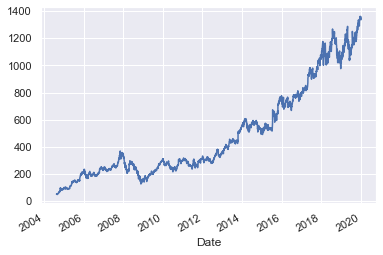

In [62]:
goog['Close'].plot()

### Resampling
resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method
* resample(): aggregate data over frequency
* asfreq(): select data based on frequency
* up-sampling

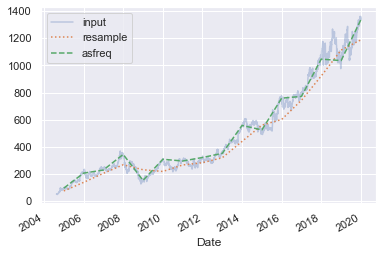

In [67]:

g = goog['Close']
g.plot(alpha = 0.3, style='-')
g.resample('BA').mean().plot(style=':')
g.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

In [74]:
data = g.iloc[:10]
data

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Name: Close, dtype: float64

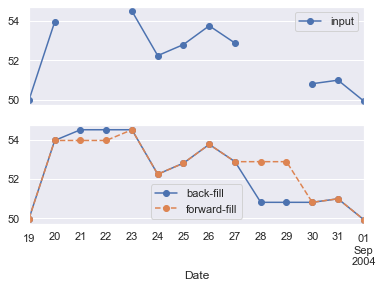

In [77]:
fig, ax = plt.subplots(2, sharex=True)
data.asfreq('D').plot(ax= ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax = ax[1], style='-o')
data.asfreq('D', method = 'ffill').plot(ax = ax[1], style='--o')
ax[0].legend(['input'])
ax[1].legend(['back-fill', 'forward-fill'])

### Time shifts
shifting of data in time
* shift(): shift data
* tshift(): shift index

In [78]:
goog = g.asfreq('D', method='pad')
goog

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-21      53.952770
2004-08-22      53.952770
2004-08-23      54.495735
                 ...     
2019-12-27    1351.890015
2019-12-28    1351.890015
2019-12-29    1351.890015
2019-12-30    1336.140015
2019-12-31    1337.020020
Freq: D, Name: Close, Length: 5613, dtype: float64

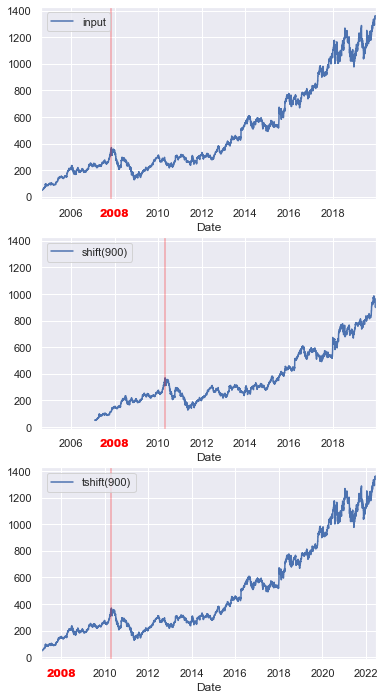

In [88]:

fig, ax = plt.subplots(3, sharey=True, figsize=(6,12))
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

In [92]:
goog.head(20)

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28    52.876804
2004-08-29    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
2004-09-02    50.565468
2004-09-03    49.818268
2004-09-04    49.818268
2004-09-05    49.818268
2004-09-06    49.818268
2004-09-07    50.600338
Freq: D, Name: Close, dtype: float64

In [91]:
goog.shift(5).head(20)

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-21          NaN
2004-08-22          NaN
2004-08-23          NaN
2004-08-24    49.982655
2004-08-25    53.952770
2004-08-26    53.952770
2004-08-27    53.952770
2004-08-28    54.495735
2004-08-29    52.239193
2004-08-30    52.802086
2004-08-31    53.753517
2004-09-01    52.876804
2004-09-02    52.876804
2004-09-03    52.876804
2004-09-04    50.814533
2004-09-05    50.993862
2004-09-06    49.937820
2004-09-07    50.565468
Freq: D, Name: Close, dtype: float64

In [93]:
goog.tshift(5).head(20)


Date
2004-08-24    49.982655
2004-08-25    53.952770
2004-08-26    53.952770
2004-08-27    53.952770
2004-08-28    54.495735
2004-08-29    52.239193
2004-08-30    52.802086
2004-08-31    53.753517
2004-09-01    52.876804
2004-09-02    52.876804
2004-09-03    52.876804
2004-09-04    50.814533
2004-09-05    50.993862
2004-09-06    49.937820
2004-09-07    50.565468
2004-09-08    49.818268
2004-09-09    49.818268
2004-09-10    49.818268
2004-09-11    49.818268
2004-09-12    50.600338
Freq: D, Name: Close, dtype: float64

In [94]:
goog.tshift(-5).head(20)


Date
2004-08-14    49.982655
2004-08-15    53.952770
2004-08-16    53.952770
2004-08-17    53.952770
2004-08-18    54.495735
2004-08-19    52.239193
2004-08-20    52.802086
2004-08-21    53.753517
2004-08-22    52.876804
2004-08-23    52.876804
2004-08-24    52.876804
2004-08-25    50.814533
2004-08-26    50.993862
2004-08-27    49.937820
2004-08-28    50.565468
2004-08-29    49.818268
2004-08-30    49.818268
2004-08-31    49.818268
2004-09-01    49.818268
2004-09-02    50.600338
Freq: D, Name: Close, dtype: float64

Text(0, 0.5, '% Return on Investment')

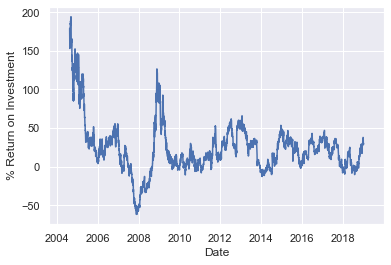

In [95]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

### Rolling Windows

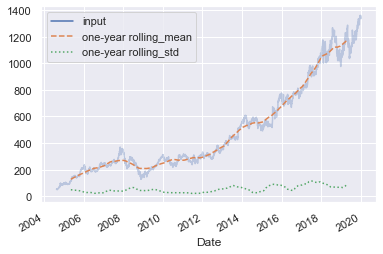

In [99]:
df = pd.DataFrame({'input':g, 'one-year rolling_mean':g.rolling(365,center=True).mean(),
'one-year rolling_std':g.rolling(365,center=True).std()} )
ax = df.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)